<a href="https://colab.research.google.com/github/dimas1625/PCVK_GANJIL_2025/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MODUL 6 – Histogram, Histogram Equalization, Dithering

Nama: Muhammad Dimas Ajie Nugroho
No: 20
Kelas: 3A

##TUGAS PRAKTIKUM

##1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah digunakan pada praktikum minggu lalu, rename file menjadi “Week6.ipy"
##Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum minggu ke-6 berikut.

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

##3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena.jpg)

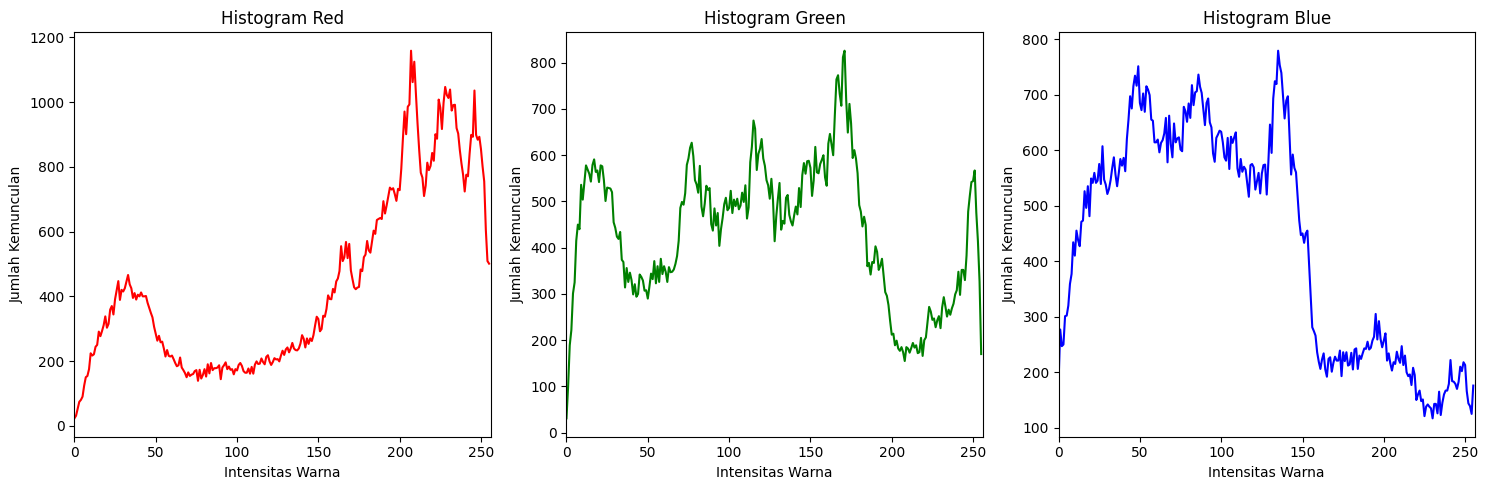

In [3]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img = cv.imread('/content/drive/MyDrive/Lena.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Memisisahkan channel R, G, B
r, g, b = cv.split(img)

# Hitung histogram manual tiap channel
hist_r = cv.calcHist([r], [0], None, [256], [0,256])
hist_g = cv.calcHist([g], [0], None, [256], [0,256])
hist_b = cv.calcHist([b], [0], None, [256], [0,256])

# Plot histogram RGB
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title("Histogram Red")
plt.xlabel("Intensitas Warna")
plt.ylabel("Jumlah Kemunculan")
plt.plot(hist_r, color='red')
plt.xlim([0,256])

plt.subplot(1,3,2)
plt.title("Histogram Green")
plt.xlabel("Intensitas Warna")
plt.ylabel("Jumlah Kemunculan")
plt.plot(hist_g, color='green')
plt.xlim([0,256])

plt.subplot(1,3,3)
plt.title("Histogram Blue")
plt.xlabel("Intensitas Warna")
plt.ylabel("Jumlah Kemunculan")
plt.plot(hist_b, color='blue')
plt.xlim([0,256])

plt.tight_layout()
plt.show()


##4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?

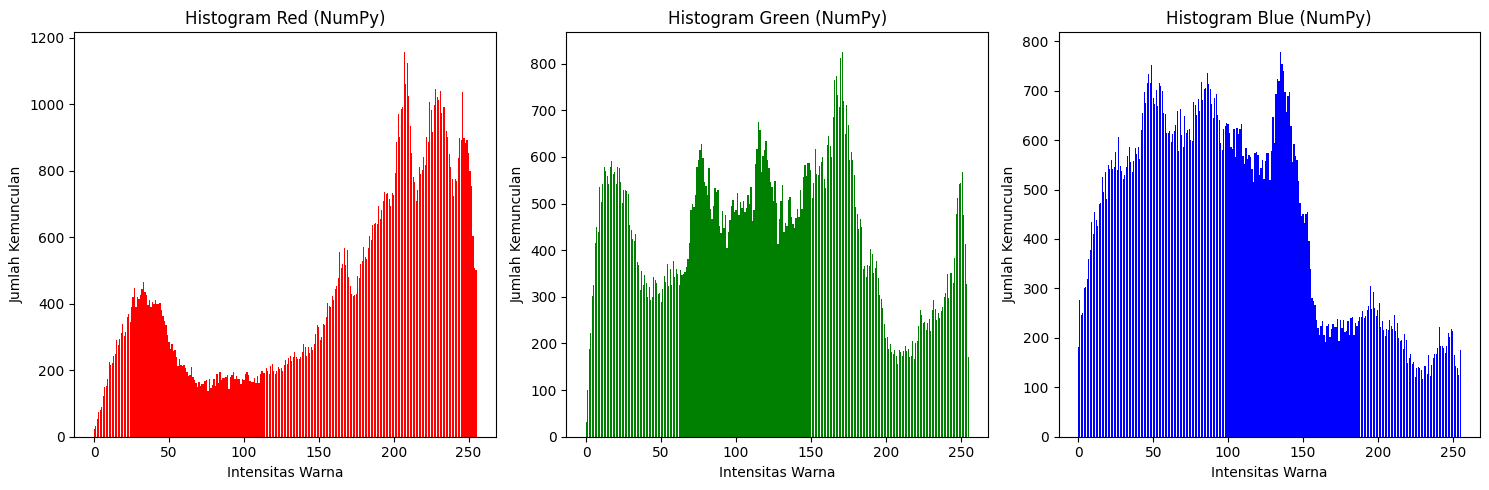

In [4]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img = cv.imread('/content/drive/MyDrive/Lena.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Memisahkan channel
r, g, b = cv.split(img)

# Histogram dengan numpy.histogram
hist_r, bins_r = np.histogram(r, bins=256, range=(0,256))
hist_g, bins_g = np.histogram(g, bins=256, range=(0,256))
hist_b, bins_b = np.histogram(b, bins=256, range=(0,256))

# Plot hasil
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title("Histogram Red (NumPy)")
plt.xlabel("Intensitas Warna")
plt.ylabel("Jumlah Kemunculan")
plt.bar(bins_r[:-1], hist_r, color='red')

plt.subplot(1,3,2)
plt.title("Histogram Green (NumPy)")
plt.xlabel("Intensitas Warna")
plt.ylabel("Jumlah Kemunculan")
plt.bar(bins_g[:-1], hist_g, color='green')

plt.subplot(1,3,3)
plt.title("Histogram Blue (NumPy)")
plt.xlabel("Intensitas Warna")
plt.ylabel("Jumlah Kemunculan")
plt.bar(bins_b[:-1], hist_b, color='blue')

plt.tight_layout()
plt.show()

##5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

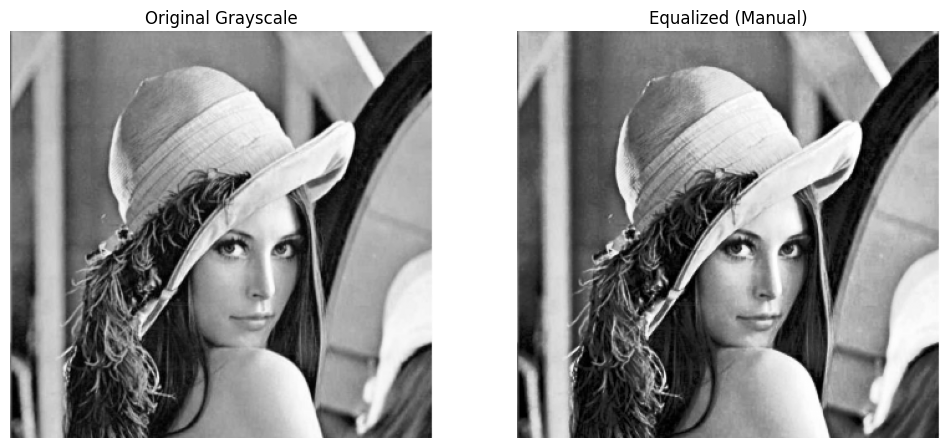

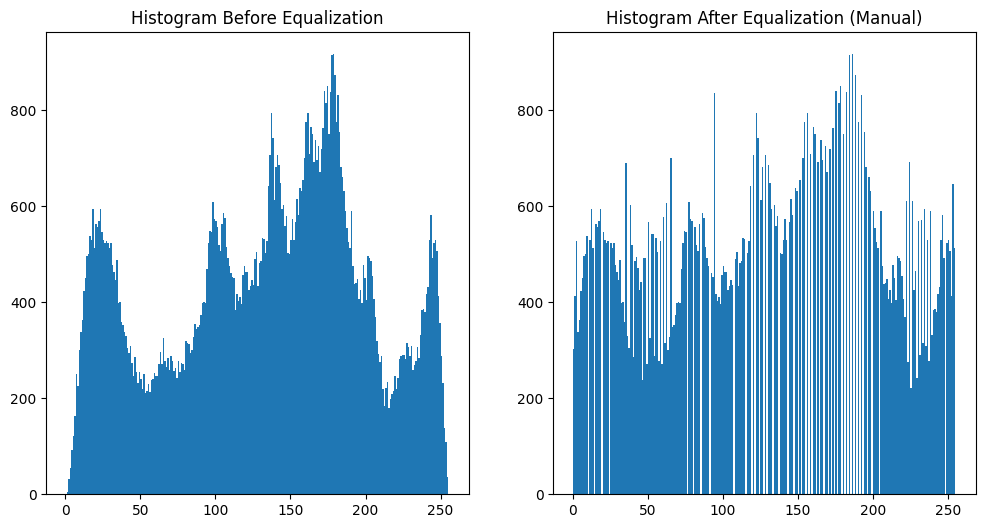

In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar
img = cv.imread('/content/drive/MyDrive/Lena.png')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# --- 1. Hitung histogram ---
hist, bins = np.histogram(gray.flatten(), 256, [0,256])

# --- 2. Hitung distribusi kumulatif ---
cdf = hist.cumsum()  # cumulative distribution function
cdf_normalized = cdf * hist.max()/ cdf.max()

# --- 3. Normalisasi CDF ---
cdf_m = np.ma.masked_equal(cdf, 0)  # masking nilai nol
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf_final = np.ma.filled(cdf_m, 0).astype('uint8')

# --- 4. Mapping pixel lama ke pixel baru ---
equalized_manual = cdf_final[gray]

# --- 5. Tampilkan gambar ---
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Original Grayscale")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(equalized_manual, cmap='gray')
plt.title("Equalized (Manual)")
plt.axis("off")
plt.show()

# --- 6. Histogram sebelum & sesudah ---
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.hist(gray.ravel(), bins=256, range=[0,256])
plt.title("Histogram Before Equalization")

plt.subplot(1,2,2)
plt.hist(equalized_manual.ravel(), bins=256, range=[0,256])
plt.title("Histogram After Equalization (Manual)")
plt.show()



##6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan hasilnya. Apakah output muncul sama?

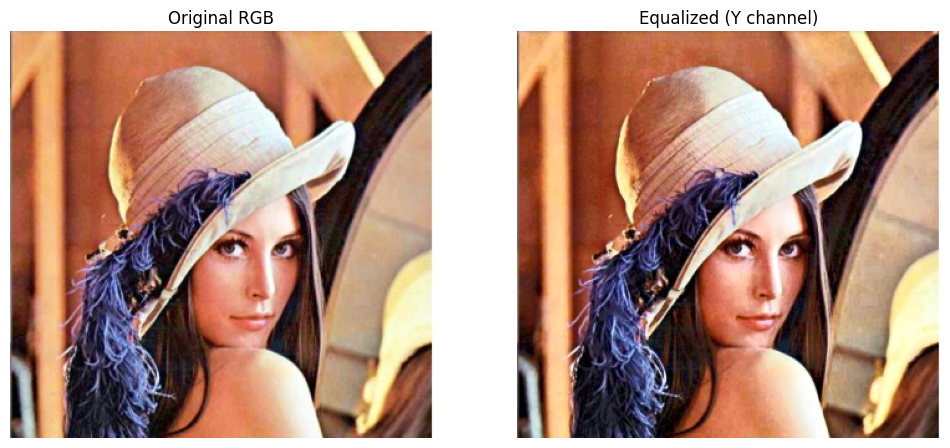

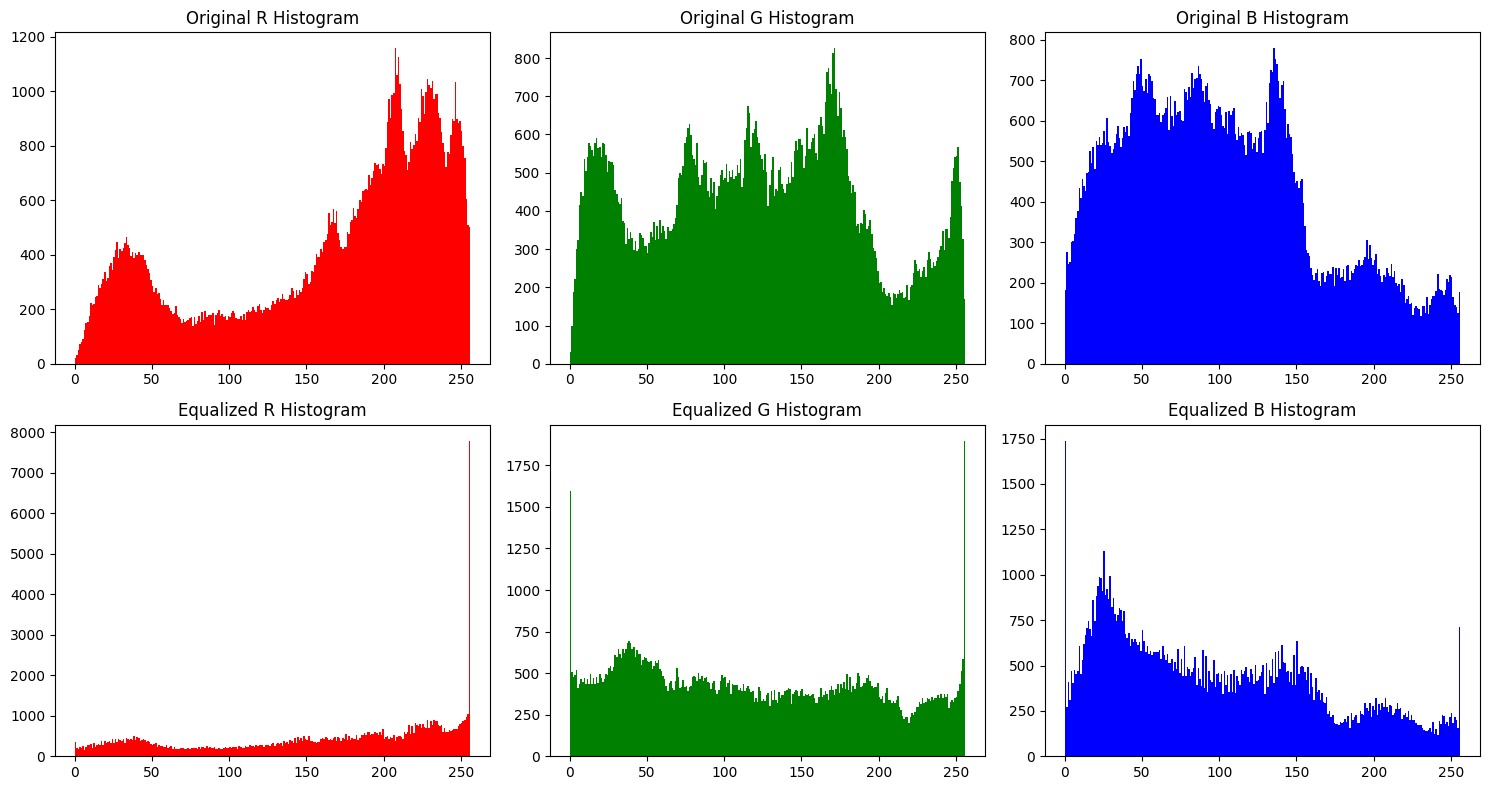

In [7]:
import cv2 as cv
import matplotlib.pyplot as plt

# Baca gambar asli
img = cv.imread('/content/drive/MyDrive/Lena.png')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Konversi ke YCrCb untuk equalization natural
ycrcb = cv.cvtColor(img, cv.COLOR_BGR2YCrCb)
y, cr, cb = cv.split(ycrcb)
y_eq = cv.equalizeHist(y)
ycrcb_eq = cv.merge((y_eq, cr, cb))
img_eq = cv.cvtColor(ycrcb_eq, cv.COLOR_YCrCb2RGB)

# --- 1. Tampilkan gambar sebelum & sesudah equalization ---
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Original RGB")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_eq)
plt.title("Equalized (Y channel)")
plt.axis("off")
plt.show()

# --- 2. Histogram RGB sebelum & sesudah ---
colors = ('r','g','b')
plt.figure(figsize=(15,8))

# Histogram original
for i, col in enumerate(colors):
    plt.subplot(2,3,i+1)
    plt.hist(img_rgb[:,:,i].ravel(), bins=256, range=[0,256], color=col)
    plt.title(f"Original {col.upper()} Histogram")

# Histogram equalized
for i, col in enumerate(colors):
    plt.subplot(2,3,i+4)
    plt.hist(img_eq[:,:,i].ravel(), bins=256, range=[0,256], color=col)
    plt.title(f"Equalized {col.upper()} Histogram")

plt.tight_layout()
plt.show()



##7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam, hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart di bawah ini! (Gunakan gambar lena.jpg)

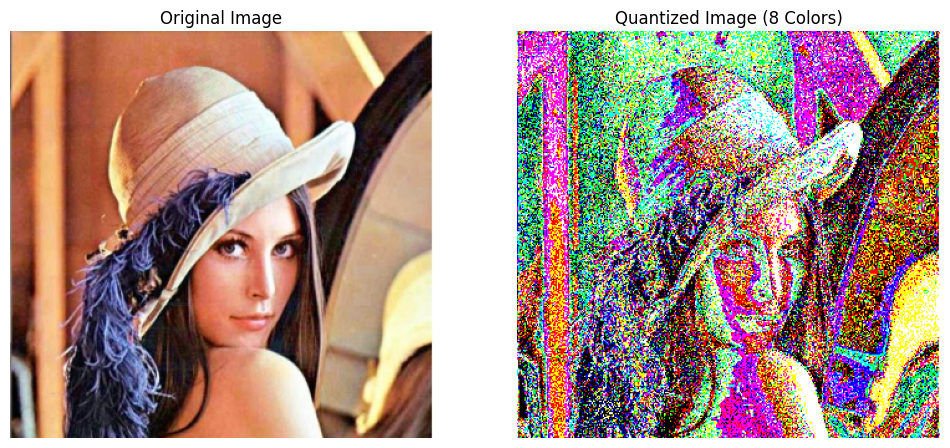

In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar
img = cv.imread('/content/drive/MyDrive/Lena.png')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Definisikan 8 warna dasar (RGB)
colors = np.array([
    [0, 0, 0],       # Hitam
    [0, 255, 0],     # Hijau
    [255, 255, 0],   # Kuning
    [0, 0, 255],     # Biru
    [0, 255, 255],   # Cyan
    [255, 0, 255],   # Magenta
    [255, 255, 255], # Putih
    [255, 0, 0],     # Merah (opsional, kalau di jobsheet masuk)
], dtype=np.uint8)

# Ubah citra ke bentuk (N, 3) agar mudah dihitung
h, w, c = img_rgb.shape
pixels = img_rgb.reshape((-1, 3))

# Hitung jarak Euclidean tiap pixel ke semua warna dasar
distances = np.sqrt(((pixels[:, np.newaxis] - colors) ** 2).sum(axis=2))

# Ambil index warna terdekat
nearest_color_idx = np.argmin(distances, axis=1)

# Ganti pixel dengan warna terdekat
quantized_pixels = colors[nearest_color_idx]
quantized_img = quantized_pixels.reshape((h, w, 3))

# Tampilkan hasil
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(quantized_img)
plt.title("Quantized Image (8 Colors)")
plt.axis("off")
plt.show()


##8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman modul ini! (Gunakan gambar lena.jpg)

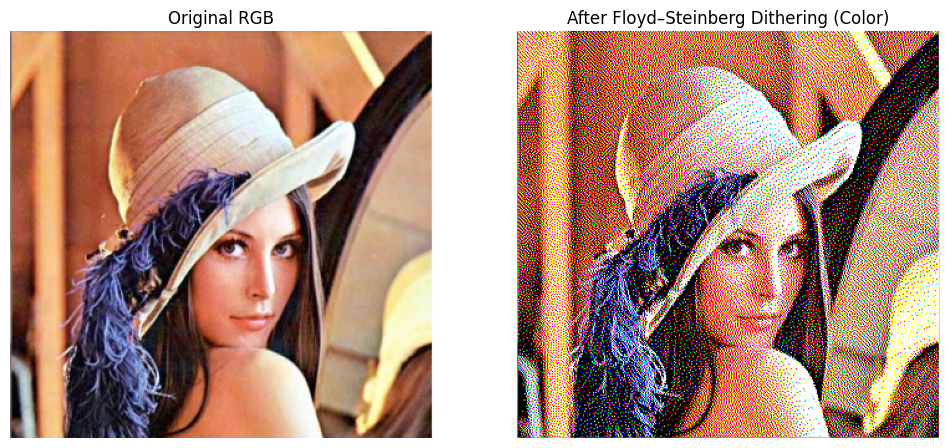

In [9]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar berwarna
img = cv.imread('/content/drive/MyDrive/Lena.png')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Copy untuk dithering
dithered = img_rgb.astype(float)
h, w, c = dithered.shape

# Floyd-Steinberg Dithering untuk tiap channel
for y in range(h-1):
    for x in range(1, w-1):
        for ch in range(3):  # 3 channel: R, G, B
            old_pixel = dithered[y, x, ch]
            new_pixel = 255 if old_pixel > 128 else 0
            dithered[y, x, ch] = new_pixel
            error = old_pixel - new_pixel

            # Sebarkan error ke tetangga channel yang sama
            dithered[y, x+1, ch]     += error * 7/16
            dithered[y+1, x-1, ch]   += error * 3/16
            dithered[y+1, x, ch]     += error * 5/16
            dithered[y+1, x+1, ch]   += error * 1/16

# Pastikan nilai pixel valid
dithered = np.clip(dithered, 0, 255).astype(np.uint8)

# Tampilkan hasil
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Original RGB")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(dithered)
plt.title("After Floyd–Steinberg Dithering (Color)")
plt.axis("off")
plt.show()



##9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga menampilkan gambar di bawah ini!

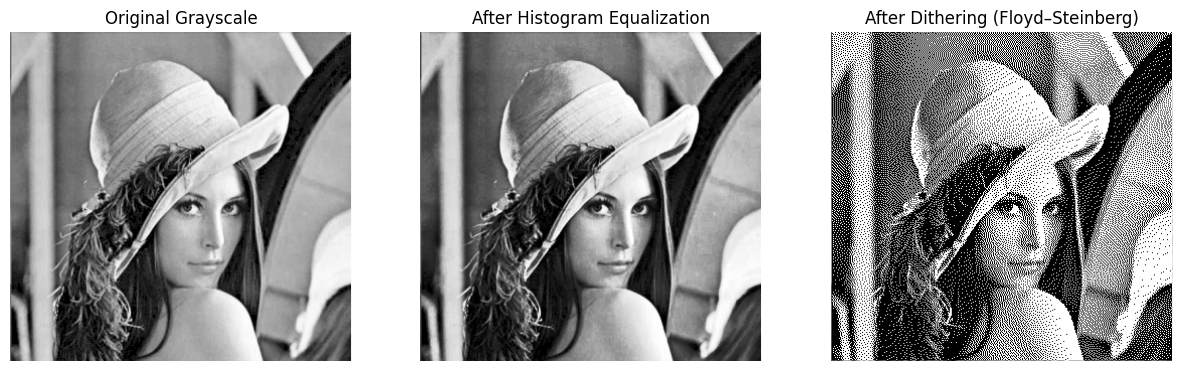

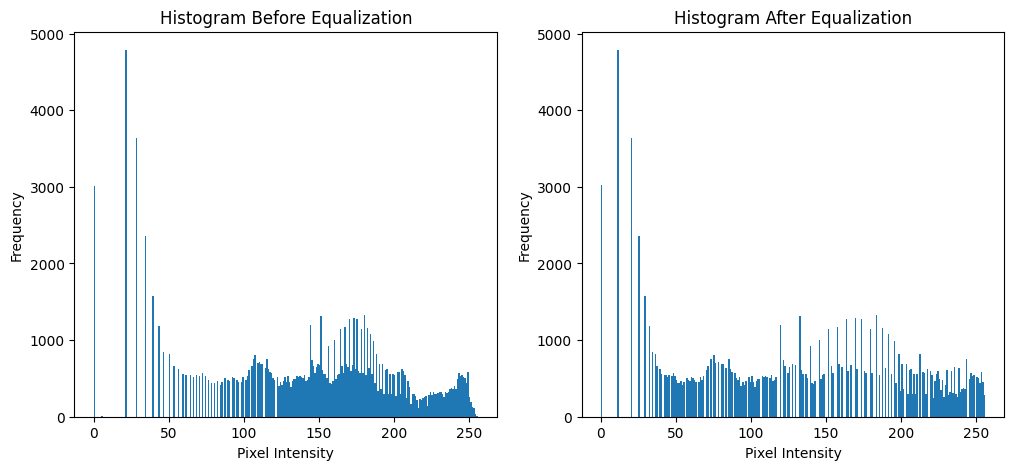

In [10]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# 1. Baca gambar lena_lc dan konversi ke grayscale
img = cv.imread('/content/drive/MyDrive/Lena.png', cv.IMREAD_GRAYSCALE)

# 2. Histogram Equalization
equalized = cv.equalizeHist(img)

# 3. Floyd–Steinberg Dithering
dithered = equalized.astype(float)
h, w = dithered.shape

for y in range(h-1):
    for x in range(1, w-1):
        old_pixel = dithered[y, x]
        new_pixel = 255 if old_pixel > 128 else 0  # threshold biner
        dithered[y, x] = new_pixel
        error = old_pixel - new_pixel

        # Sebarkan error ke tetangga (kernel Floyd–Steinberg)
        dithered[y, x+1]     += error * 7/16
        dithered[y+1, x-1]   += error * 3/16
        dithered[y+1, x]     += error * 5/16
        dithered[y+1, x+1]   += error * 1/16

# Pastikan nilai pixel valid
dithered = np.clip(dithered, 0, 255).astype(np.uint8)

# 4. Tampilkan gambar
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title("Original Grayscale")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(equalized, cmap='gray')
plt.title("After Histogram Equalization")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(dithered, cmap='gray')
plt.title("After Dithering (Floyd–Steinberg)")
plt.axis("off")
plt.show()

# 5. Tampilkan histogram sebelum & sesudah equalization
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(img.ravel(), bins=256, range=[0,256])
plt.title("Histogram Before Equalization")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
plt.hist(equalized.ravel(), bins=256, range=[0,256])
plt.title("Histogram After Equalization")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()
